In [2]:
from matplotlib import pyplot as plt
import random
import os
import pandas as pd
import polars as pl
import numpy as np
import seaborn as sns

python(33531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [3]:
results = pd.read_csv('agg_results_50k.csv')

In [41]:
results.shape

(28650000, 7)

In [42]:
results.insert(2, '2', results['0'].astype(str) + '_' + results['1'].astype(str))
len(results['2'].unique())

573

In [43]:
len(results['ei'].unique())

50000

In [44]:
# ExpId,Trial,Node
# results[['0','1','2','ei','memory','search_cost','tau','6']].sort_values(by=['6'], ascending=False)[0:5]

In [45]:
# Dataset,ExpId,Trial
trial_df = results.groupby(['0','1','ei','memory','search_cost','tau'])[['6']].mean()
trial_df = trial_df.reset_index()

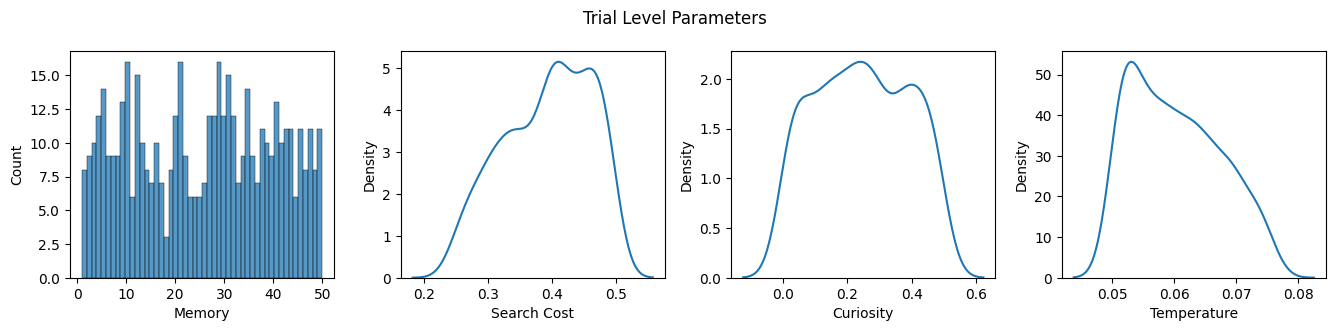

In [46]:
howmany = 500
top = trial_df.sort_values(by=['6'],ascending=False)[0:howmany].copy()

fix,axs = plt.subplots(1,4,figsize=(13.33,3.33))
axes = axs.flatten()
sns.histplot(data=top, x='memory', ax=axes[0], bins=50)
sns.kdeplot(data=top, x='search_cost', ax=axes[1])
sns.kdeplot(data=top, x='ei', ax=axes[2])
sns.kdeplot(data=top, x='tau', ax=axes[3])

# axes[0].set_title('Memory')
# axes[1].set_title('Search Cost')
# axes[2].set_title('Curiosity')
# axes[3].set_title('Temperature')

axes[0].set_xlabel('Memory')
axes[1].set_xlabel('Search Cost')
axes[2].set_xlabel('Curiosity')
axes[3].set_xlabel('Temperature')

plt.suptitle('Trial Level Parameters')
plt.tight_layout()
plt.savefig('figures/4panel_MLE_trial.jpeg')
plt.show()

In [47]:
trial_df.sort_values(by=['6'],ascending=False)[0:5]

,0,1,ei,memory,search_cost,tau,6
25450248,2041,1,0.002723,27,0.490226,0.050150,-0.001067
25484316,2041,1,0.342778,5,0.498743,0.050711,-0.001089
25471835,2041,1,0.217909,27,0.492376,0.050590,-0.001163
25491988,2041,1,0.418625,26,0.487403,0.051039,-0.001429
25487019,2041,1,0.368971,48,0.483283,0.050820,-0.001454


In [48]:
top.mean()

0              2041.000000
1                 1.000000
ei                0.245882
memory           25.498000
search_cost       0.392409
tau               0.060333
6                -0.057573
dtype: float64

In [49]:
# Dataset,ExpId
trial_df = results.groupby(['0','ei','memory','search_cost','tau'])[['6']].mean()
trial_df = trial_df.reset_index()
# trial_df.sort_values(by=['6'],ascending=False)

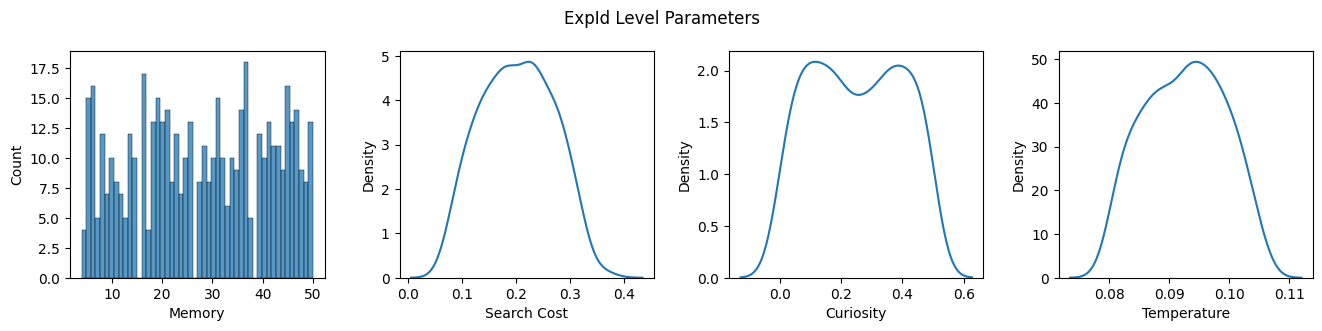

In [50]:
howmany = 500
top = trial_df.sort_values(by=['6'],ascending=False)[0:howmany].copy()

fix,axs = plt.subplots(1,4,figsize=(13.33,3.33))
axes = axs.flatten()
sns.histplot(data=top, x='memory', ax=axes[0], bins=50)
sns.kdeplot(data=top, x='search_cost', ax=axes[1])
sns.kdeplot(data=top, x='ei', ax=axes[2])
sns.kdeplot(data=top, x='tau', ax=axes[3])

# axes[0].set_title('Memory')
# axes[1].set_title('Search Cost')
# axes[2].set_title('Curiosity')
# axes[3].set_title('Temperature')

axes[0].set_xlabel('Memory')
axes[1].set_xlabel('Search Cost')
axes[2].set_xlabel('Curiosity')
axes[3].set_xlabel('Temperature')

plt.suptitle('ExpId Level Parameters')
plt.tight_layout()
plt.savefig('figures/4panel_MLE_expid.jpeg')
plt.show()

In [51]:
trial_df.sort_values(by=['6'],ascending=False)[0:5]

,0,ei,memory,search_cost,tau,6
3305218,2041,0.052259,31,0.215573,0.089078,-20.512799
3317206,2041,0.172734,42,0.192297,0.092786,-20.521395
3309743,2041,0.097837,5,0.193296,0.092778,-20.525931
3303661,2041,0.037063,39,0.203403,0.091218,-20.535505
3337185,2041,0.370560,5,0.190160,0.092353,-20.557955


In [52]:
top.mean()

0              2041.028000
ei                0.250618
memory           27.786000
search_cost       0.202318
tau               0.092576
6               -21.160552
dtype: float64

In [53]:
# Dataset
trial_df = results.groupby(['ei','memory','search_cost','tau'])[['6']].mean()
trial_df = trial_df.reset_index()
# trial_df.sort_values(by=['6'],ascending=False)

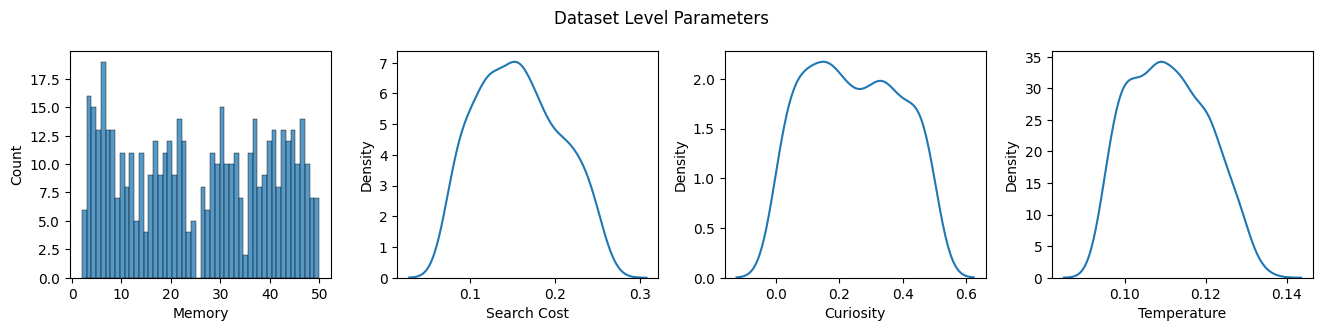

In [54]:
howmany = 500
top = trial_df.sort_values(by=['6'],ascending=False)[0:howmany].copy()

fix,axs = plt.subplots(1,4,figsize=(13.33,3.33))
axes = axs.flatten()
sns.histplot(data=top, x='memory', ax=axes[0], bins=50)
sns.kdeplot(data=top, x='search_cost', ax=axes[1])
sns.kdeplot(data=top, x='ei', ax=axes[2])
sns.kdeplot(data=top, x='tau', ax=axes[3])

# axes[0].set_title('Memory')
# axes[1].set_title('Search Cost')
# axes[2].set_title('Curiosity')
# axes[3].set_title('Temperature')

axes[0].set_xlabel('Memory')
axes[1].set_xlabel('Search Cost')
axes[2].set_xlabel('Curiosity')
axes[3].set_xlabel('Temperature')

plt.suptitle('Dataset Level Parameters')
plt.tight_layout()
plt.savefig('figures/4panel_MLE_dataset.jpeg')
plt.show()

In [55]:
trial_df.sort_values(by=['6'],ascending=False)[0:5]

,ei,memory,search_cost,tau,6
12605,0.126827,3,0.126666,0.113775,-233.359392
15364,0.154615,3,0.149748,0.111929,-233.386081
39884,0.397610,4,0.166126,0.105974,-233.805609
31329,0.312833,6,0.144136,0.107867,-233.951330
34141,0.341048,6,0.137192,0.107449,-234.166793


In [56]:
top.mean()

ei               0.244311
memory          25.438000
search_cost      0.157283
tau              0.110791
6             -238.556688
dtype: float64